In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("diabetes.csv")
df.head()
dfc = df

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
df[df["Pregnancies"]>10].Outcome.value_counts()

1    20
0    14
Name: Outcome, dtype: int64

In [9]:
from  scipy import  stats 
def find_outliers(feature):
    return stats.iqr(feature)>3 or stats.iqr(feature)<-3

Pregnancies True
Glucose True
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction False
Age True
Outcome False


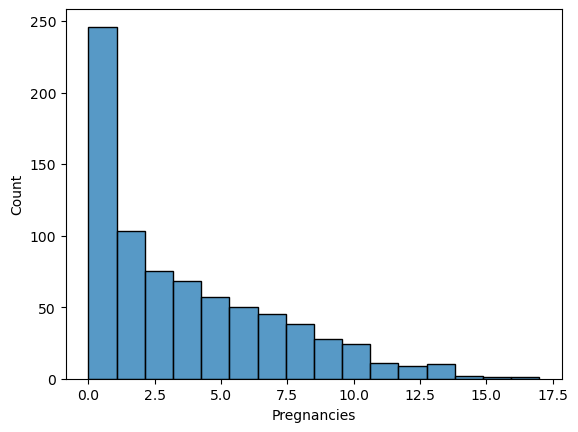

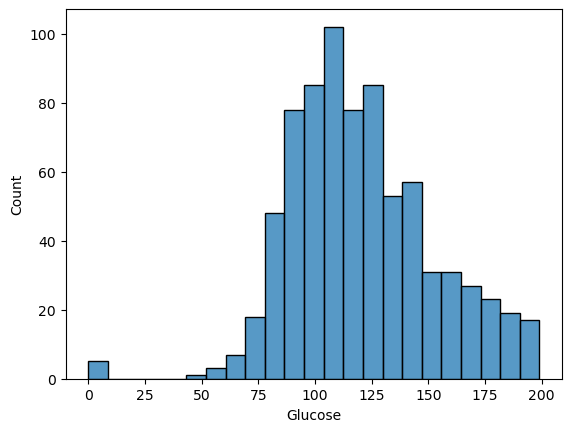

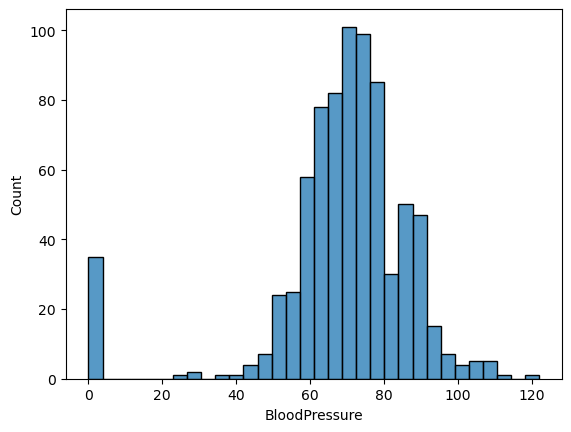

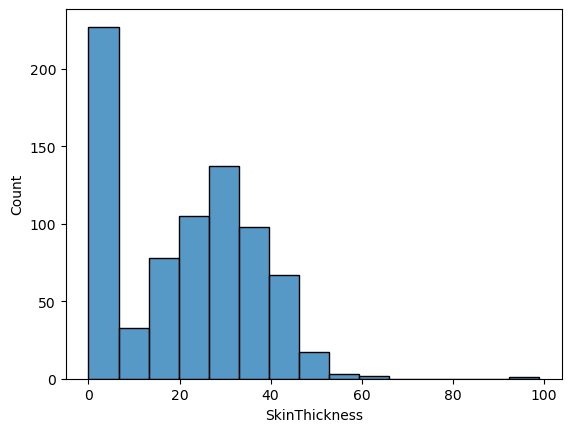

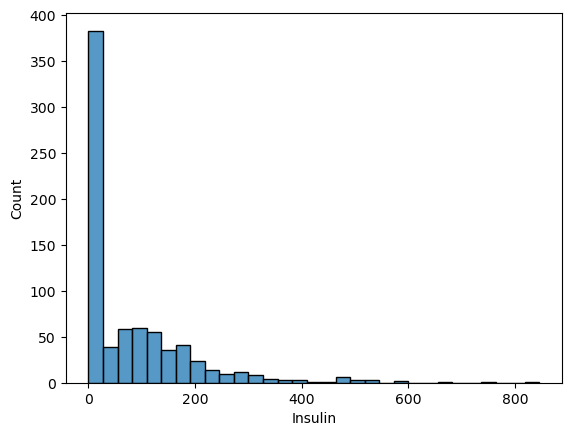

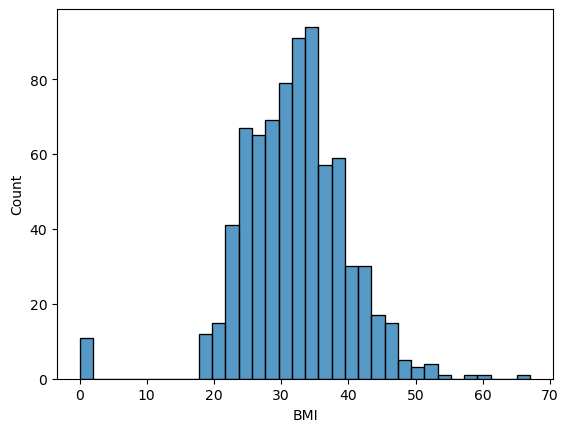

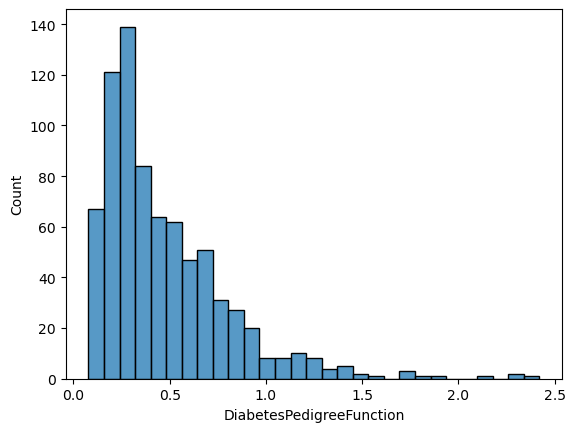

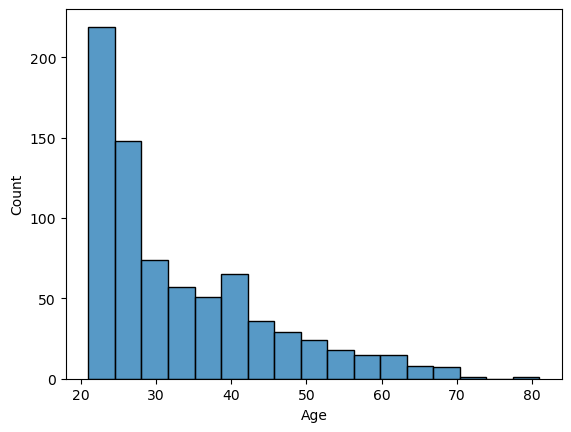

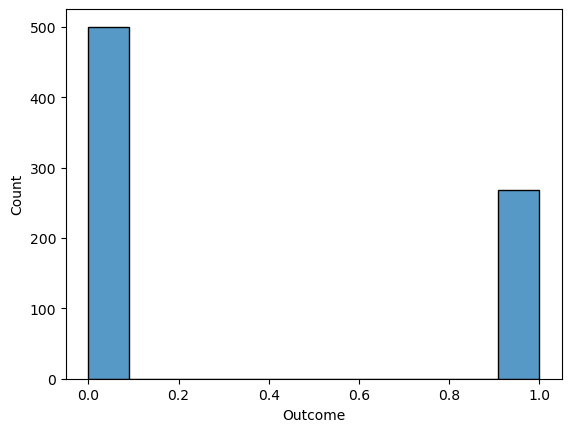

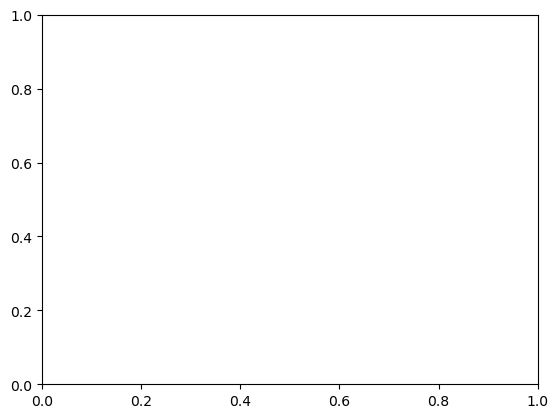

In [10]:
for i in df.columns:
    print(i,find_outliers(df[i]))
    sns.histplot(df[i])
    plt.subplots()

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
# checking for those values that are not possible
not_possible = df[df['Glucose']<50]
not_possible

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
62,5,44,62,0,0,25.0,0.587,36,0
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [13]:
not_possible.Glucose

62     44
75      0
182     0
342     0
349     0
502     0
Name: Glucose, dtype: int64

In [18]:
for i in range(df.shape[0]):
    if df['Glucose'].iloc[i]<50:
        df['Glucose'].iloc[i] = df.Glucose.median()

In [19]:
df.Glucose.iloc[0]

148

In [20]:
df.Glucose.describe()

count    768.000000
mean     121.751302
std       30.309174
min       56.000000
25%      100.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

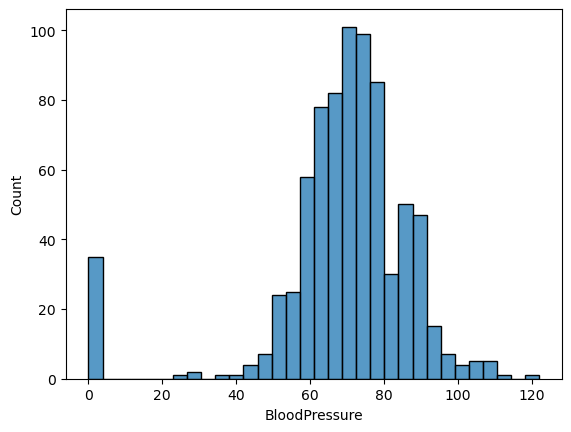

In [21]:
sns.histplot(df['BloodPressure'])

In [22]:
df[df["BloodPressure"]==0].shape

(35, 9)

In [23]:
df[df["BloodPressure"]<=40].shape


(40, 9)

In [24]:
df.BloodPressure.replace(0,df.BloodPressure.median(),inplace=True)

In [25]:
df[df["BloodPressure"]<40]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
18,1,103,30,38,83,43.3,0.183,33,0
125,1,88,30,42,99,55.0,0.496,26,1
597,1,89,24,19,25,27.8,0.559,21,0
599,1,109,38,18,120,23.1,0.407,26,0


In [26]:
df.drop(df[df["BloodPressure"]<40].index,inplace=True)


In [27]:
df[df["SkinThickness"]<7].shape[0] + df[df["SkinThickness"]>50].shape[0]

236

In [28]:
df.SkinThickness.replace(0,df.SkinThickness.median(),inplace=True)

In [29]:
df.drop(df[df["SkinThickness"]>50].index,inplace=True)

In [31]:
df[df['Insulin']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,23,0,23.3,0.672,32,1
5,5,116,74,23,0,25.6,0.201,30,0
7,10,115,72,23,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,23,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,23,0,30.1,0.349,47,1


In [32]:
df.drop('Insulin',axis=1,inplace=True)

<AxesSubplot:xlabel='BMI', ylabel='Count'>

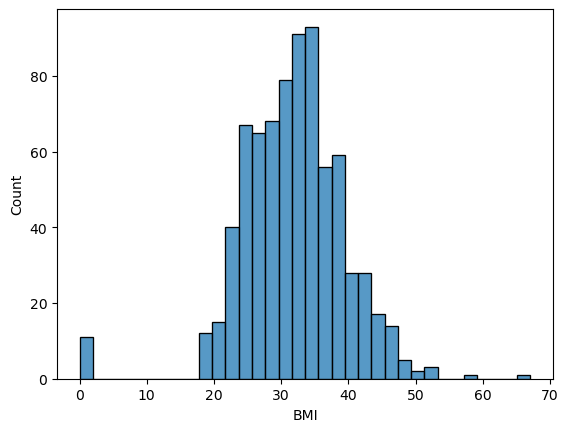

In [33]:
sns.histplot(df["BMI"])

In [34]:
df[df['BMI']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,23,0.0,0.232,54,1
49,7,105,72,23,0.0,0.305,24,0
60,2,84,72,23,0.0,0.304,21,0
81,2,74,72,23,0.0,0.102,22,0
145,0,102,75,23,0.0,0.572,21,0
371,0,118,64,23,0.0,1.731,21,0
426,0,94,72,23,0.0,0.256,25,0
494,3,80,72,23,0.0,0.174,22,0
522,6,114,72,23,0.0,0.189,26,0
684,5,136,82,23,0.0,0.640,69,0


In [35]:
df.BMI.replace(0,df.BMI.median(),inplace=True)

In [36]:
df[df['BMI']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome


In [37]:
# Dropping the exteme conditions of BMI i.e greater than 50
df.drop(df[df["BMI"]>50].index,inplace=True)

In [38]:
stdf = df.copy()
ndf = df.copy()

<AxesSubplot:>

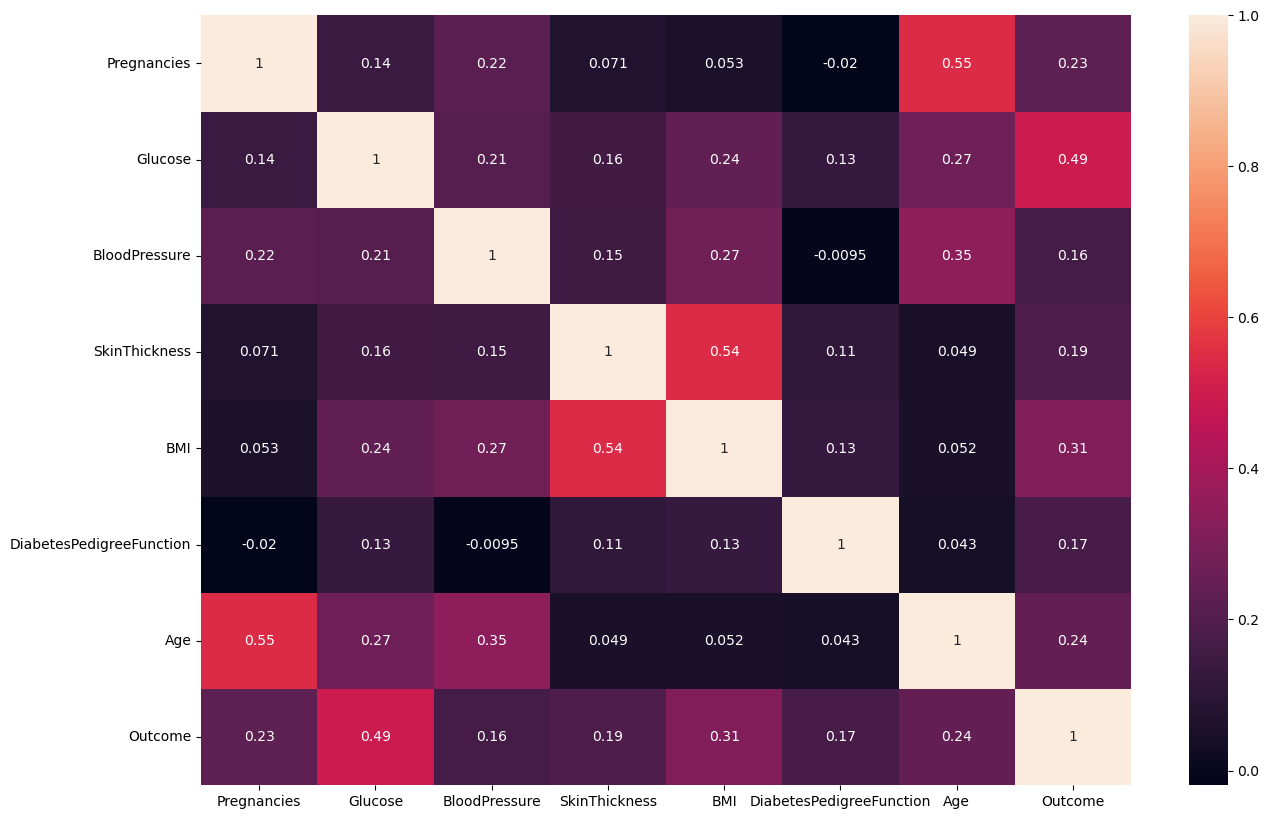

In [57]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [51]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [52]:
stdf[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI','DiabetesPedigreeFunction', 'Age']] = mms.fit_transform(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI','DiabetesPedigreeFunction', 'Age']])

<AxesSubplot:>

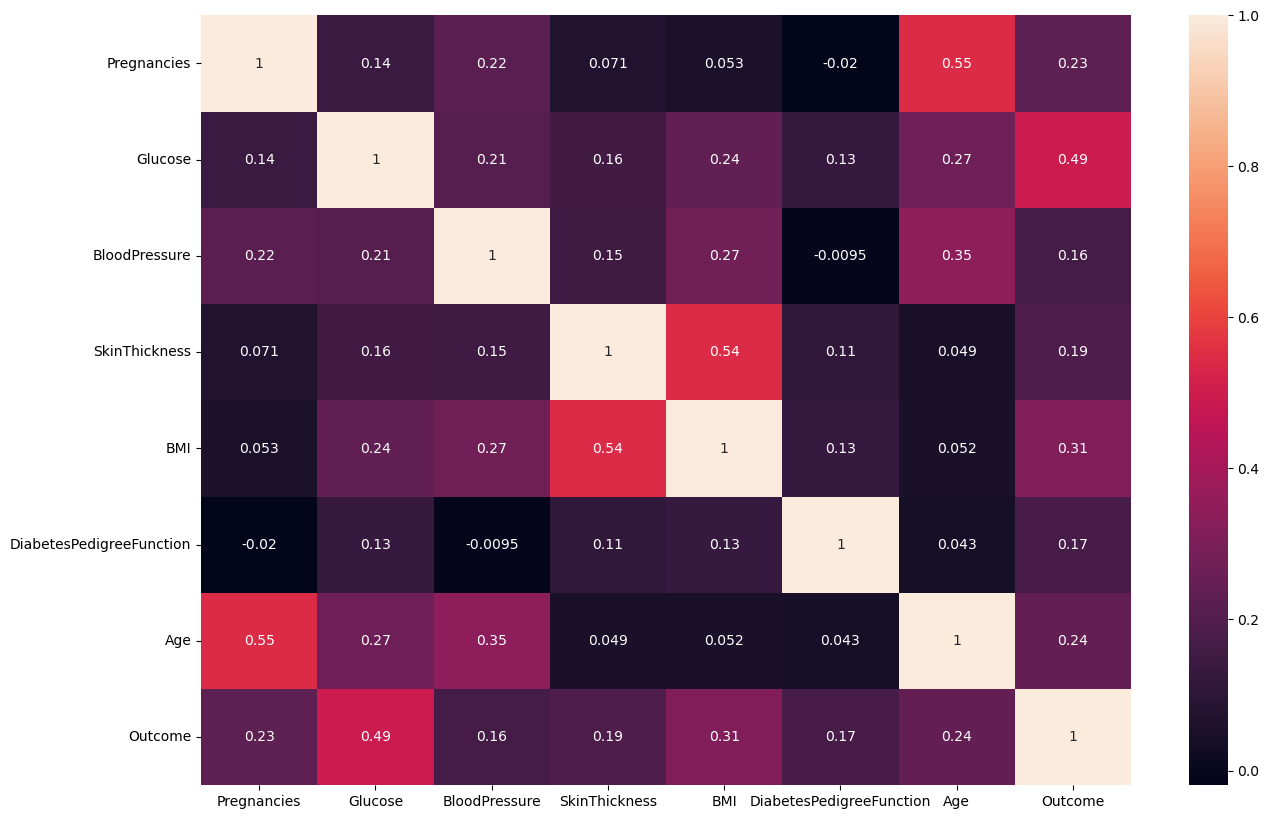

In [56]:
plt.figure(figsize=(15,10))
sns.heatmap(stdf.corr(),annot=True)

In [58]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ndf[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI','DiabetesPedigreeFunction', 'Age']] = ss.fit_transform(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI','DiabetesPedigreeFunction', 'Age']])
x = stdf[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI','DiabetesPedigreeFunction', 'Age']]
y = stdf['Outcome']

In [59]:
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy = train_test_split(x,y,random_state=42)

In [60]:
!pip install lazypredict

In [63]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(trainx,testx,trainy,testy)

# Print the performance of each classifier
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.75it/s]

[LightGBM] [Info] Number of positive: 197, number of negative: 365
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 554
[LightGBM] [Info] Number of data points in the train set: 562, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350534 -> initscore=-0.616694
[LightGBM] [Info] Start training from score -0.616694
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [65]:
import sklearn
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm

In [66]:
# Splitting the dataset into training and testing sets.
x = df.iloc[:, :-2]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)
# Creating the SVM model.
clf = svm.SVC(kernel='rbf')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [67]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7866666666666666


In [68]:
from sklearn.metrics import confusion_matrix

In [81]:
confusion_matrix(y_test,y_pred)

array([[95,  9],
       [23, 23]], dtype=int64)

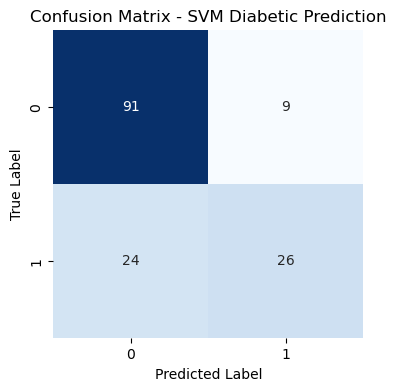

In [93]:
trainx,testx,trainy,testy
# Split the data into training and testing sets
trainx,testx,trainy,testy = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
trainx = scaler.fit_transform(trainx)
testx = scaler.transform(testx)

# Create the SVM classifier with the RBF kernel (you can choose other kernels if needed)
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(trainx, trainy)

# Predict on the test data
y_pred = svm_classifier.predict(testx)

# Create the confusion matrix
cm = confusion_matrix(testy, y_pred)

# Plot the heatmap
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM Diabetic Prediction')
plt.show()

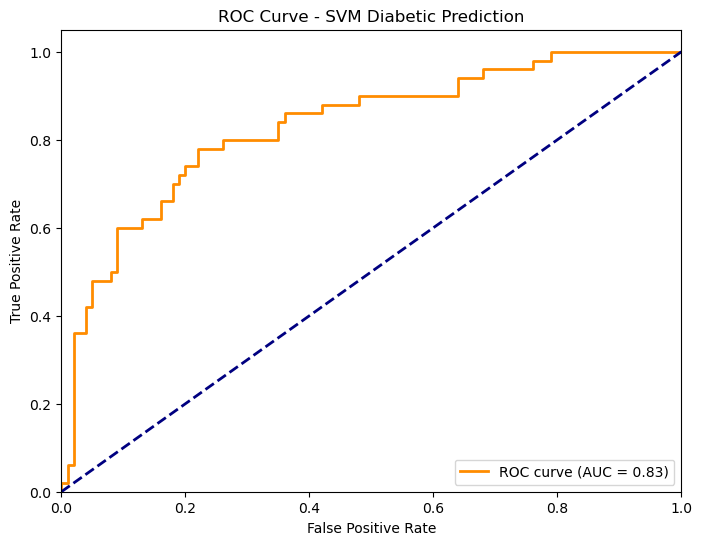

In [95]:
from sklearn.metrics import roc_curve, auc
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(trainx, trainy)

# Predict probabilities for the positive class (diabetic) for ROC curve
y_prob = svm_classifier.decision_function(testx)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(testy, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM Diabetic Prediction')
plt.legend(loc='lower right')
plt.show()